In [1]:
%matplotlib inline 
%pylab inline
import pandas 
import seaborn 
import numpy 
import matplotlib 
from matplotlib.pyplot import figure
from pandas import Series, DataFrame

%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (12,8)

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pandas.read_csv('Uber_data_july.csv')

In [3]:
# Look for missing data

for col in data.columns: 
    pct_missing = numpy.mean(data[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

Date/Time - 0.0%
Lat - 0.0%
Lon - 0.0%
Base - 0.0%


In [4]:
data['Date/Time'] = data['Date/Time'].map(pandas.to_datetime)

In [5]:
data.head()

,Date/Time,Lat,Lon,Base
0,2014-07-01 00:03:00,40.7586,-73.9706,B02512
1,2014-07-01 00:05:00,40.7605,-73.9994,B02512
2,2014-07-01 00:06:00,40.7320,-73.9999,B02512
3,2014-07-01 00:09:00,40.7635,-73.9793,B02512
4,2014-07-01 00:20:00,40.7204,-74.0047,B02512


In [6]:
def get_dom(dt):
    return dt.day

data['dom'] = data['Date/Time'].map(get_dom)

In [7]:
def get_weekday(dt):
    return dt.weekday()

data['weekday'] = data['Date/Time'].map(get_weekday)

def get_hour(dt): 
    return dt.hour 

data['hour'] = data['Date/Time'].map(get_hour)

data.head()

,Date/Time,Lat,Lon,Base,dom,weekday,hour
0,2014-07-01 00:03:00,40.7586,-73.9706,B02512,1,1,0
1,2014-07-01 00:05:00,40.7605,-73.9994,B02512,1,1,0
2,2014-07-01 00:06:00,40.7320,-73.9999,B02512,1,1,0
3,2014-07-01 00:09:00,40.7635,-73.9793,B02512,1,1,0
4,2014-07-01 00:20:00,40.7204,-74.0047,B02512,1,1,0


In [8]:
# Analysis 

In [9]:
## Analyze the Day of July

''

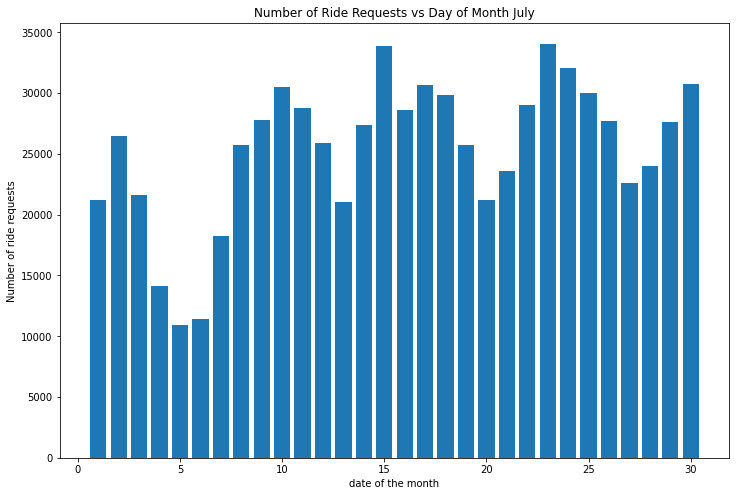

In [10]:
hist(data.dom, bins = 30, rwidth =.8, range = (0.5, 30.5))
xlabel('date of the month')
ylabel('Number of ride requests')
title('Number of Ride Requests vs Day of Month July')
;

In [11]:
def count_rows(rows): 
    return len(rows)

by_date = data.groupby('dom').apply(count_rows)
by_date

dom
1     21228
2     26480
3     21597
4     14148
5     10890
6     11443
7     18280
8     25763
9     27817
10    30541
11    28752
12    25936
13    21082
14    27350
15    33845
16    28607
17    30710
18    29860
19    25726
20    21212
21    23578
22    29029
23    34073
24    32050
25    29975
26    27708
27    22590
28    23981
29    27589
30    30740
31    33541
dtype: int64

In [12]:
by_date_sorted = by_date.sort_values()
by_date_sorted

dom
5     10890
6     11443
4     14148
7     18280
13    21082
20    21212
1     21228
3     21597
27    22590
21    23578
28    23981
19    25726
8     25763
12    25936
2     26480
14    27350
29    27589
26    27708
9     27817
16    28607
11    28752
22    29029
18    29860
25    29975
10    30541
17    30710
30    30740
24    32050
31    33541
15    33845
23    34073
dtype: int64

In [13]:
# Hour Analysis

''

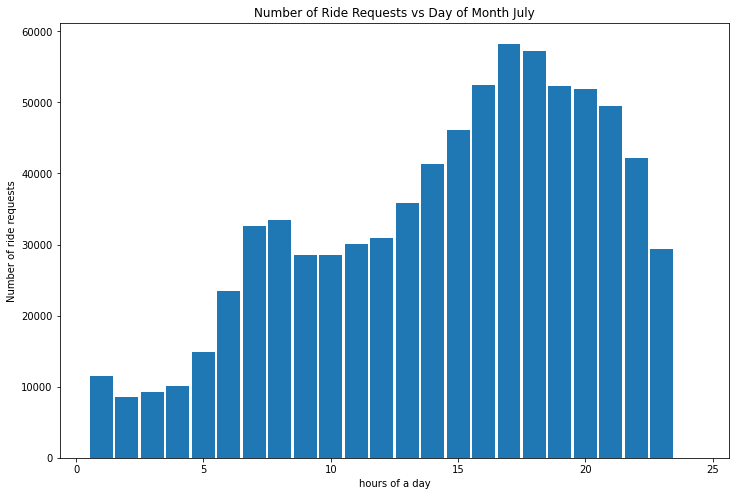

In [19]:
#data.plot.bar(range (1, 31), by_date_sorted)
#xticks(get_dom(1, 31), by_date_sorted.index)
#x.label('Day of the Month')
#y.label('Rides requested')
#title('Rides requested by dat of the month')
;

hist(data.hour, bins = 24, rwidth =.9, range = (0.5, 24.5))
xlabel('hours of a day')
ylabel('Number of ride requests')
title('Number of Ride Requests vs Day of Month July')
;

''

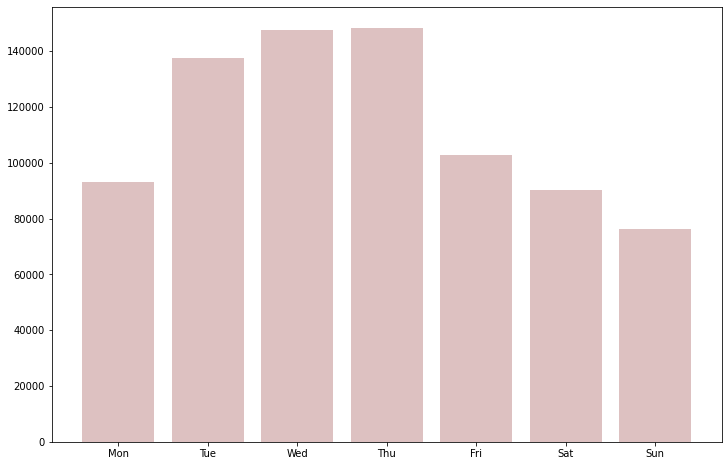

In [22]:
hist(data.weekday, bins=7, range=(-.5,6.5), rwidth=.8, color='#AA6666', alpha=.4)
xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())
;

In [23]:
by_cross = data.groupby('weekday hour'.split()).apply(count_rows).unstack()

''

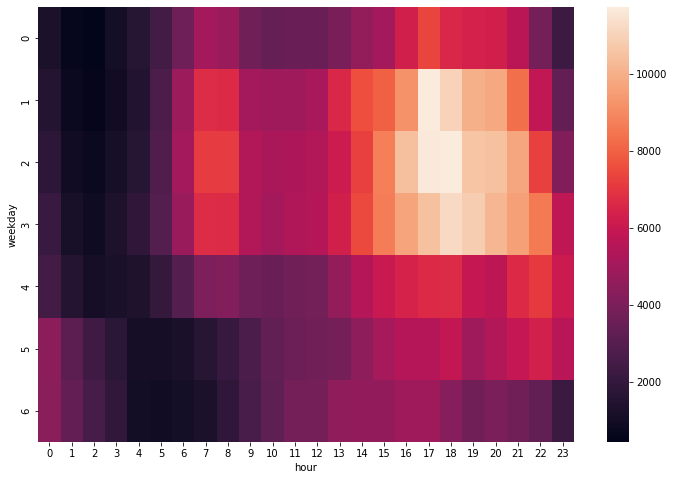

In [33]:
seaborn.heatmap(by_cross)
;

In [25]:
# Analyzing Latitude and Longitude 

''

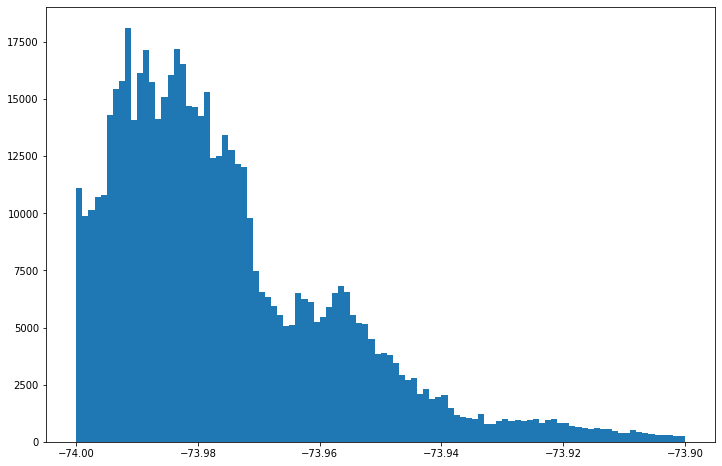

In [26]:
hist(data['Lon'], bins = 100, range = (-74.0, -73.9))
;

''

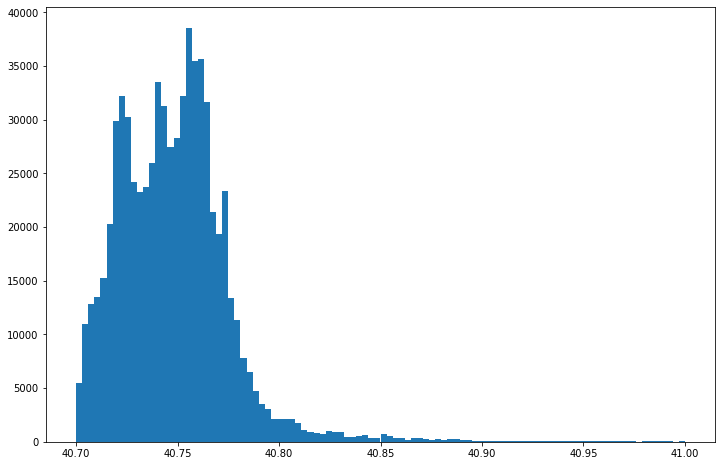

In [32]:
hist(data['Lat'], bins = 100, range = (40.7, 41))
;

''

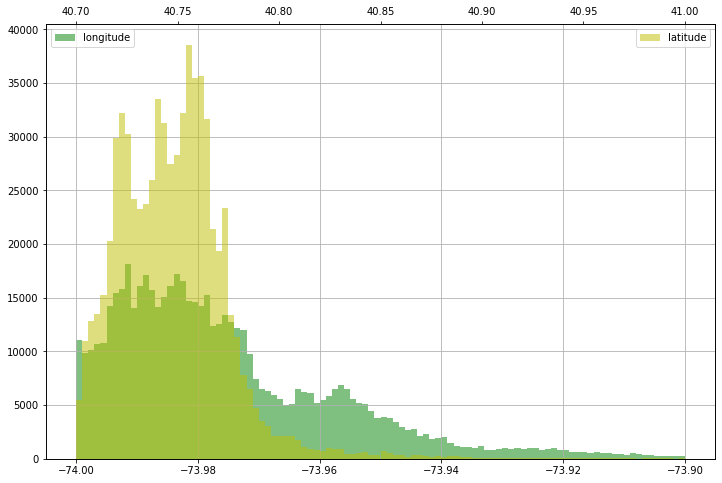

In [27]:
hist(data['Lon'], bins=100, range = (-74.0, -73.9), color='g', alpha=.5, label = 'longitude')
grid()
legend(loc='upper left')
twiny()
hist(data['Lat'], bins=100, range = (40.7, 41), color='y', alpha=.5, label = 'latitude')
legend(loc='best')
;

In [ ]:
#
 Mapping Data 

In [28]:
data.max(axis=1)

0         40.7586
1         40.7605
2         40.7320
3         40.7635
4         40.7204
           ...   
796116    40.7285
796117    40.7615
796118    40.6770
796119    40.7225
796120    40.7199
Length: 796121, dtype: float64

In [29]:
data.min(axis=1)

0        -73.9706
1        -73.9994
2        -73.9999
3        -73.9793
4        -74.0047
           ...   
796116   -73.9846
796117   -73.9868
796118   -73.9515
796119   -74.0038
796120   -73.9884
Length: 796121, dtype: float64

(40.7, 41.0)

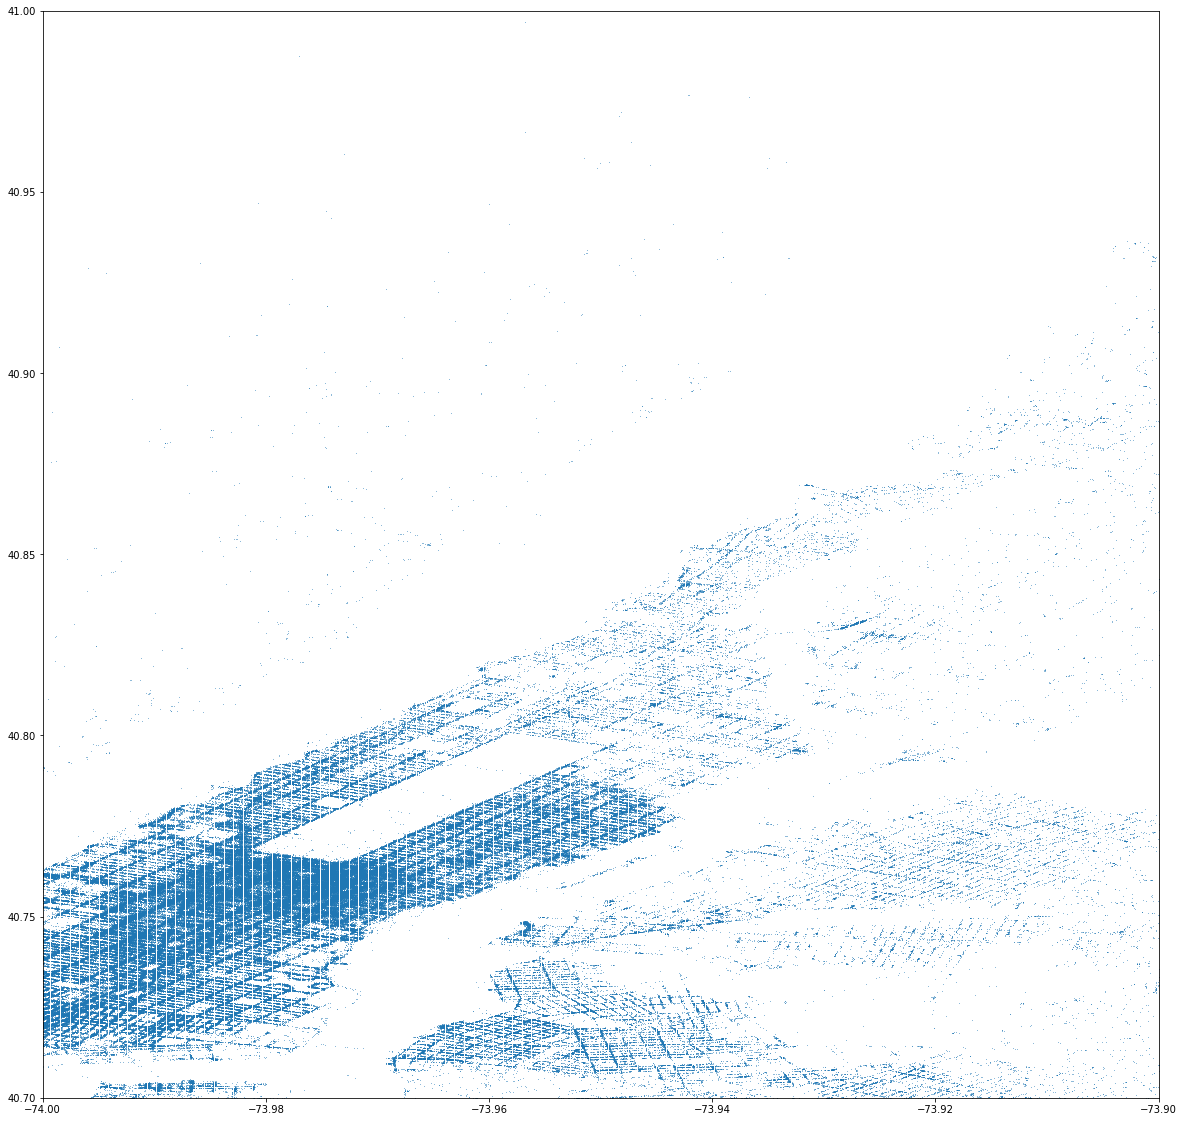

In [ ]:
figure(figsize=(20,20))
plot(data['Lon'], data['Lat'], ',', ms=1, alpha=.5)
xlim(-74.0, -73.9)
ylim(40.7, 41 )

In [ ]:
# Mapping the Lat & Lon shows that a high concentration of ride requests occured
#in the lower East side and even a significant amount from Brooklyn closest to Manhattan
# highest concentration occuring near Central Park,specifically near Carnegie Hall and MoMA. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9ce42db4-7c03-4cf3-bc40-8496a771072f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>